<a href="https://colab.research.google.com/github/putrihazizahr/TugasPBF-120450060/blob/main/TUBES_AI_10_RB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# library for df processing
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
# library for df visualization
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
# library for modeling
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, KFold, cross_val_predict, cross_val_score, cross_validate
# library for model evaluation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://drive.google.com/file/d/1ksXMXP53f-j7HZFg6F202a4jwWHGy6Z3/view?usp=share_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# CLEANING DATA

check unique & value counts

In [ ]:
print("gender : ",len(df["gender"].unique()))
print("ever_married : ",len(df["ever_married"].unique()))
print("work_type : ",len(df["work_type"].unique()))
print("Residence_type : ",len(df["Residence_type"].unique()))
print("smoking_status : ",len(df["smoking_status"].unique()))

gender :  3
ever_married :  2
work_type :  5
Residence_type :  2
smoking_status :  4


In [ ]:
df['gender'].astype('category')

0         Male
1       Female
2         Male
3       Female
4       Female
         ...  
5105    Female
5106    Female
5107    Female
5108      Male
5109    Female
Name: gender, Length: 5110, dtype: category
Categories (3, object): ['Female', 'Male', 'Other']

In [ ]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [ ]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

cek missing value

In [ ]:
# Check missing value
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Handling misiing value

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [ ]:
print(df['bmi'].mean())
print(df['bmi'].median())

28.893236911794663
28.4


In [ ]:
df['bmi'].isnull().sum()

0

In [ ]:
df.select_dtypes(include = "object").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df=df.copy()

**categorical variabel** : gender, hypertension, heart_disease, ever_married, work_type,residence_type, smoking_status




**Numerical variabel** : id, age, avg_glucose_level, bmi, smoking_status

Data test : atribut stroke

# **eda dan preprocessing**

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.dtypes.value_counts() # Return a Series containing counts of unique rows in the DataFrame.

object     5
int64      4
float64    3
dtype: int64

In [ ]:
df.shape

(5110, 12)

In [ ]:
atr_df = df.drop(columns='stroke')
atr_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [ ]:
cls_df = df['stroke']
cls_df.head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: stroke, Length: 100, dtype: int64

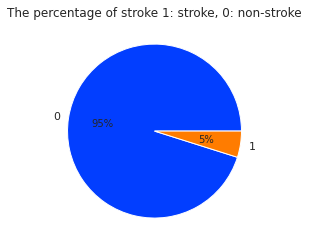

In [ ]:
data = df["stroke"].value_counts()
labels = df["stroke"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("The percentage of stroke 1: stroke, 0: non-stroke");
#Ada 201 nilai BMI yang nol dalam kumpulan data. Selain itu datanya tidak seimbang oleh karena itu kami perlu menyelesaikan masalah ini untuk hasil yang lebih baik.

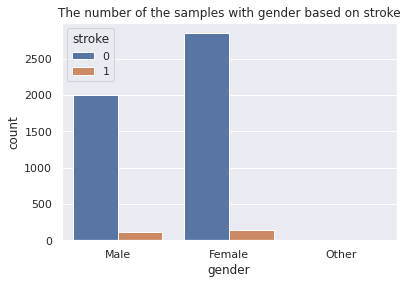

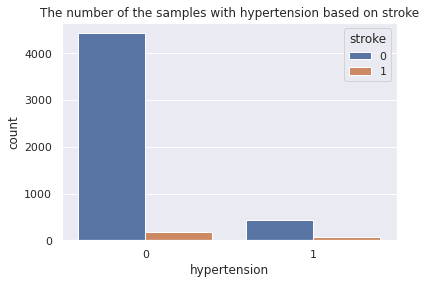

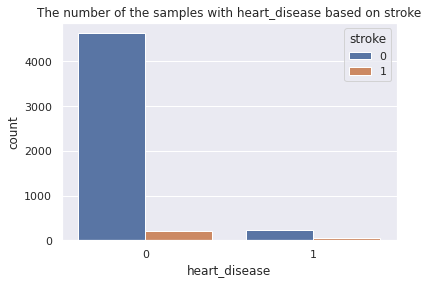

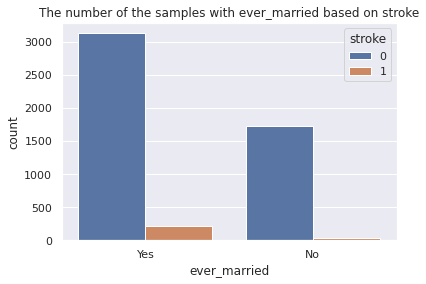

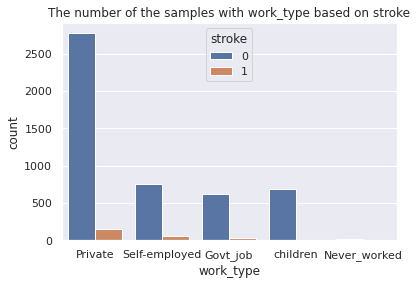

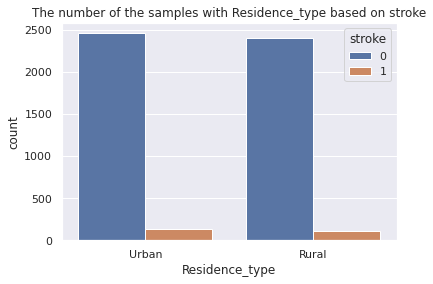

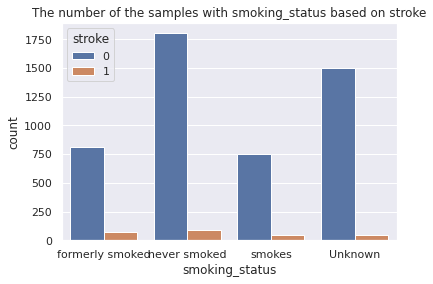

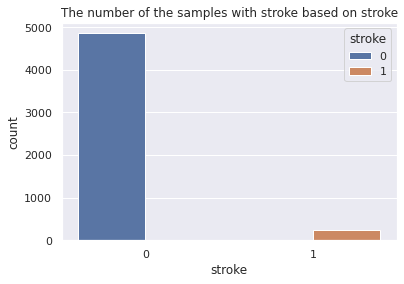

In [ ]:
# CATEGORICAL FEATURES GROUPED BY STROKE
sns.set_theme(style = 'darkgrid')
for i in df.columns[1:]:  # exclude stroke column
    if (df[i].dtype == 'object') or (df[i].dtype == 'int64'):
            sns.countplot(data = df, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

In [ ]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

# Analisis categorical dan numerical data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Analysing categorical data
y=df['stroke']
X=df
y=y.to_frame()
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)
print(y.shape)
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(5110,)
(5110, 11)
(3066, 11)
(2044, 11)
(2044,)
(3066,)


In [ ]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
773,26973,Female,31.0,0,0,Yes,Private,Urban,106.51,40.2,never smoked
3548,48883,Male,61.0,0,0,Yes,Govt_job,Rural,192.47,30.3,never smoked
4126,13902,Female,42.0,0,0,Yes,Private,Urban,74.80,50.6,Unknown
2545,19504,Female,66.0,0,0,Yes,Private,Rural,87.84,52.8,Unknown
4687,63022,Female,59.0,0,0,Yes,Self-employed,Urban,88.10,30.7,never smoked


In [ ]:
X_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

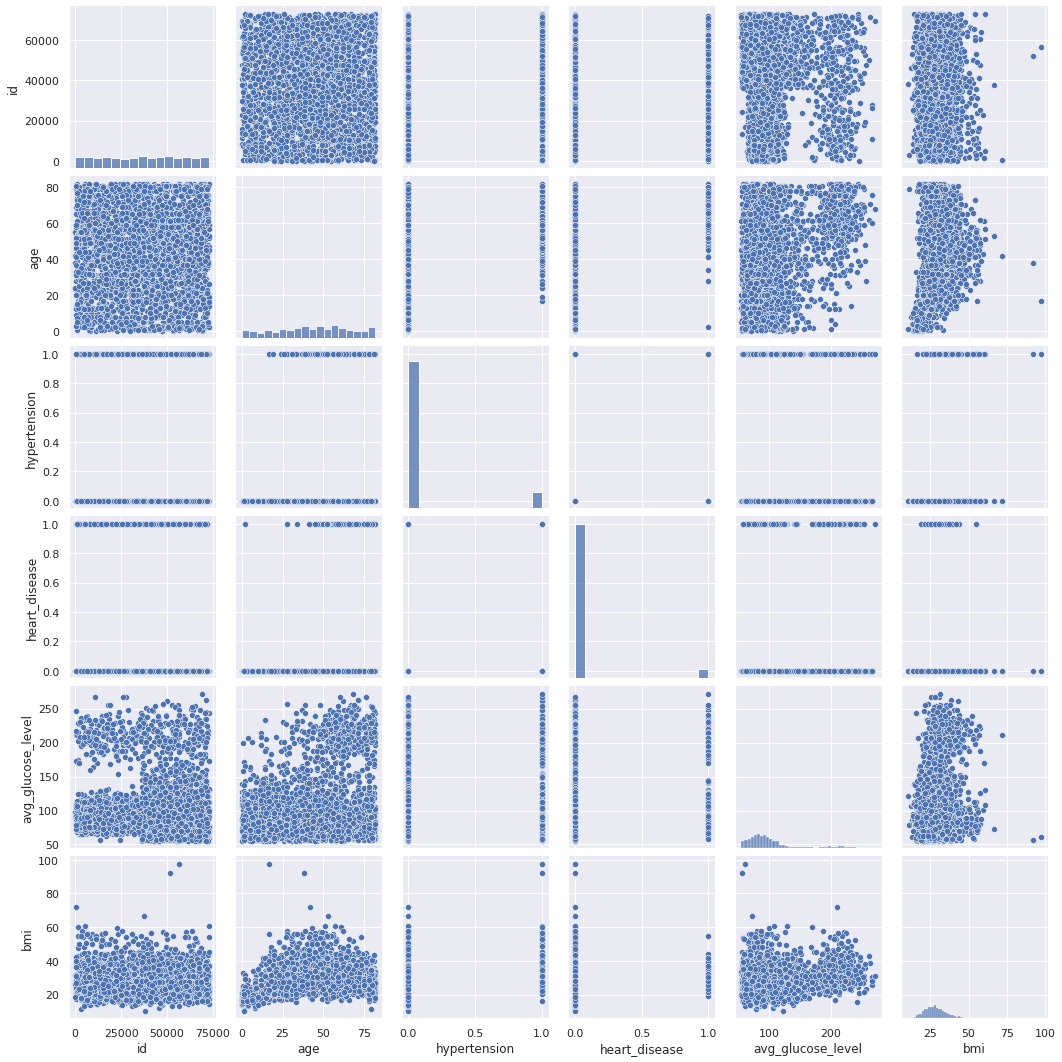

In [ ]:
sns.pairplot(X_train,diag_kind='hist')

In [ ]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
X_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
773,26973,Female,31.0,0,0,Yes,Private,Urban,106.51,40.2,never smoked
3548,48883,Male,61.0,0,0,Yes,Govt_job,Rural,192.47,30.3,never smoked
4126,13902,Female,42.0,0,0,Yes,Private,Urban,74.80,50.6,Unknown
2545,19504,Female,66.0,0,0,Yes,Private,Rural,87.84,52.8,Unknown
4687,63022,Female,59.0,0,0,Yes,Self-employed,Urban,88.10,30.7,never smoked


In [ ]:
y_train.head()

773     0
3548    0
4126    0
2545    0
4687    0
Name: stroke, dtype: int64

# Split the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.drop(['stroke'],axis=1)
y = df['stroke'].to_frame()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('X train Shape : ', X_train.shape)
print('X test Shape : ', X_train.shape)
print('Y train Shape : ', y_train.shape)
print('Y test Shape : ', y_test.shape)

X train Shape :  (4088, 11)
X test Shape :  (4088, 11)
Y train Shape :  (4088, 1)
Y test Shape :  (1022, 1)


In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.transform(y_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']
X_over, y_over = oversample.fit_resample(X, y)

1    4861
0    4861
Name: stroke, dtype: int64


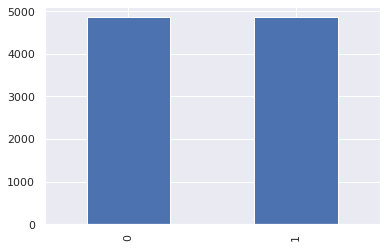

In [ ]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

# **The Encoding Process**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Modelling

# Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # prediksi

Entropy

Data test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate model DecisionTreeClassifier dengan indeks kriteria gini
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test, )
y_pred_en

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('Skor akurasi test-set : {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Skor akurasi test-set : 0.9366


Data train

In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('skor akurasi training-set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

skor akurasi training-set: 0.9562


dari perbandinga skor akurasi training-set adalah 0,9562 sedangkan akurasi test-set menjadi 0,9366. Kedua nilai ini cukup sebanding. Jadi, tidak ada tanda-tanda overfitting ataupun underfitting.

[Text(0.5, 0.875, 'X[2] <= 53.5\nentropy = 0.261\nsamples = 3832\nvalue = [3663, 169]'),
 Text(0.25, 0.625, 'X[2] <= 44.5\nentropy = 0.066\nsamples = 2440\nvalue = [2421, 19]'),
 Text(0.125, 0.375, 'X[8] <= 58.115\nentropy = 0.031\nsamples = 1901\nvalue = [1895, 6]'),
 Text(0.0625, 0.125, 'entropy = 0.235\nsamples = 52\nvalue = [50, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.022\nsamples = 1849\nvalue = [1845, 4]'),
 Text(0.375, 0.375, 'X[0] <= 72900.0\nentropy = 0.164\nsamples = 539\nvalue = [526, 13]'),
 Text(0.3125, 0.125, 'entropy = 0.154\nsamples = 538\nvalue = [526, 12]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[2] <= 67.5\nentropy = 0.493\nsamples = 1392\nvalue = [1242, 150]'),
 Text(0.625, 0.375, 'X[8] <= 110.47\nentropy = 0.337\nsamples = 738\nvalue = [692, 46]'),
 Text(0.5625, 0.125, 'entropy = 0.208\nsamples = 489\nvalue = [473, 16]'),
 Text(0.6875, 0.125, 'entropy = 0.531\nsamples = 249\nvalue = [219, 30]'),
 Text(0.875, 0.375,

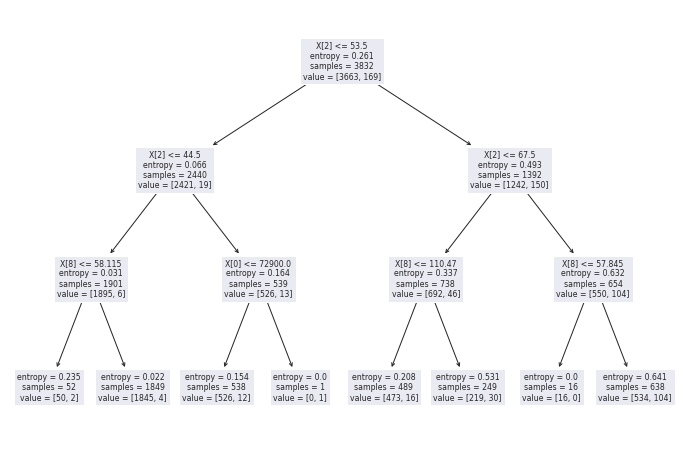

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate model DecisionTreeClassifier dengan indeks kriteria gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Memprediksi hasil Test set dengan kriteria indeks gini
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
# Cek skor akurasi dengan kriteria indeks gini
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9382


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9562


In [ ]:
# mencetak skor pada set train dan test
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9562
Test set score: 0.9382


aakurasi sebanding jadi tidak ada tanda overfitting

[Text(0.5, 0.875, 'X[2] <= 67.5\ngini = 0.084\nsamples = 3832\nvalue = [3663, 169]'),
 Text(0.25, 0.625, 'X[2] <= 53.5\ngini = 0.04\nsamples = 3178\nvalue = [3113, 65]'),
 Text(0.125, 0.375, 'X[0] <= 72916.0\ngini = 0.015\nsamples = 2440\nvalue = [2421, 19]'),
 Text(0.0625, 0.125, 'gini = 0.015\nsamples = 2438\nvalue = [2420, 18]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.375, 0.375, 'X[8] <= 110.47\ngini = 0.117\nsamples = 738\nvalue = [692, 46]'),
 Text(0.3125, 0.125, 'gini = 0.063\nsamples = 489\nvalue = [473, 16]'),
 Text(0.4375, 0.125, 'gini = 0.212\nsamples = 249\nvalue = [219, 30]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\ngini = 0.267\nsamples = 654\nvalue = [550, 104]'),
 Text(0.625, 0.375, 'X[3] <= 0.5\ngini = 0.386\nsamples = 65\nvalue = [48, 17]'),
 Text(0.5625, 0.125, 'gini = 0.295\nsamples = 50\nvalue = [41, 9]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.875, 0.375, 'X[8] <= 104.095\ngini = 0.252\nsamples = 589\

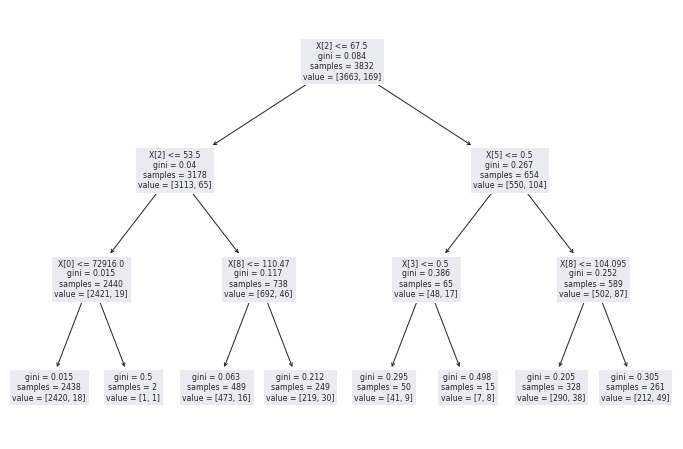

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

# ID3

In [ ]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
 max_features=None, max_leaf_nodes=None, random_state=0)

In [ ]:
trained = classifier.fit(X_train, y_train)

In [ ]:
import sklearn
test_predictions = trained.predict(X_test).tolist()
ID3TestAccuracy = sklearn.metrics.accuracy_score(y_test, test_predictions)

print('ID3 Testing accuracy: ',ID3TestAccuracy)

train_predictions = trained.predict(X_train).tolist()
ID3TrainAccuracy = sklearn.metrics.accuracy_score(y_train, train_predictions)

print('ID3 Training accuracy: ',ID3TrainAccuracy)

ID3 Testing accuracy:  0.9029733959311425
ID3 Training accuracy:  1.0


In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

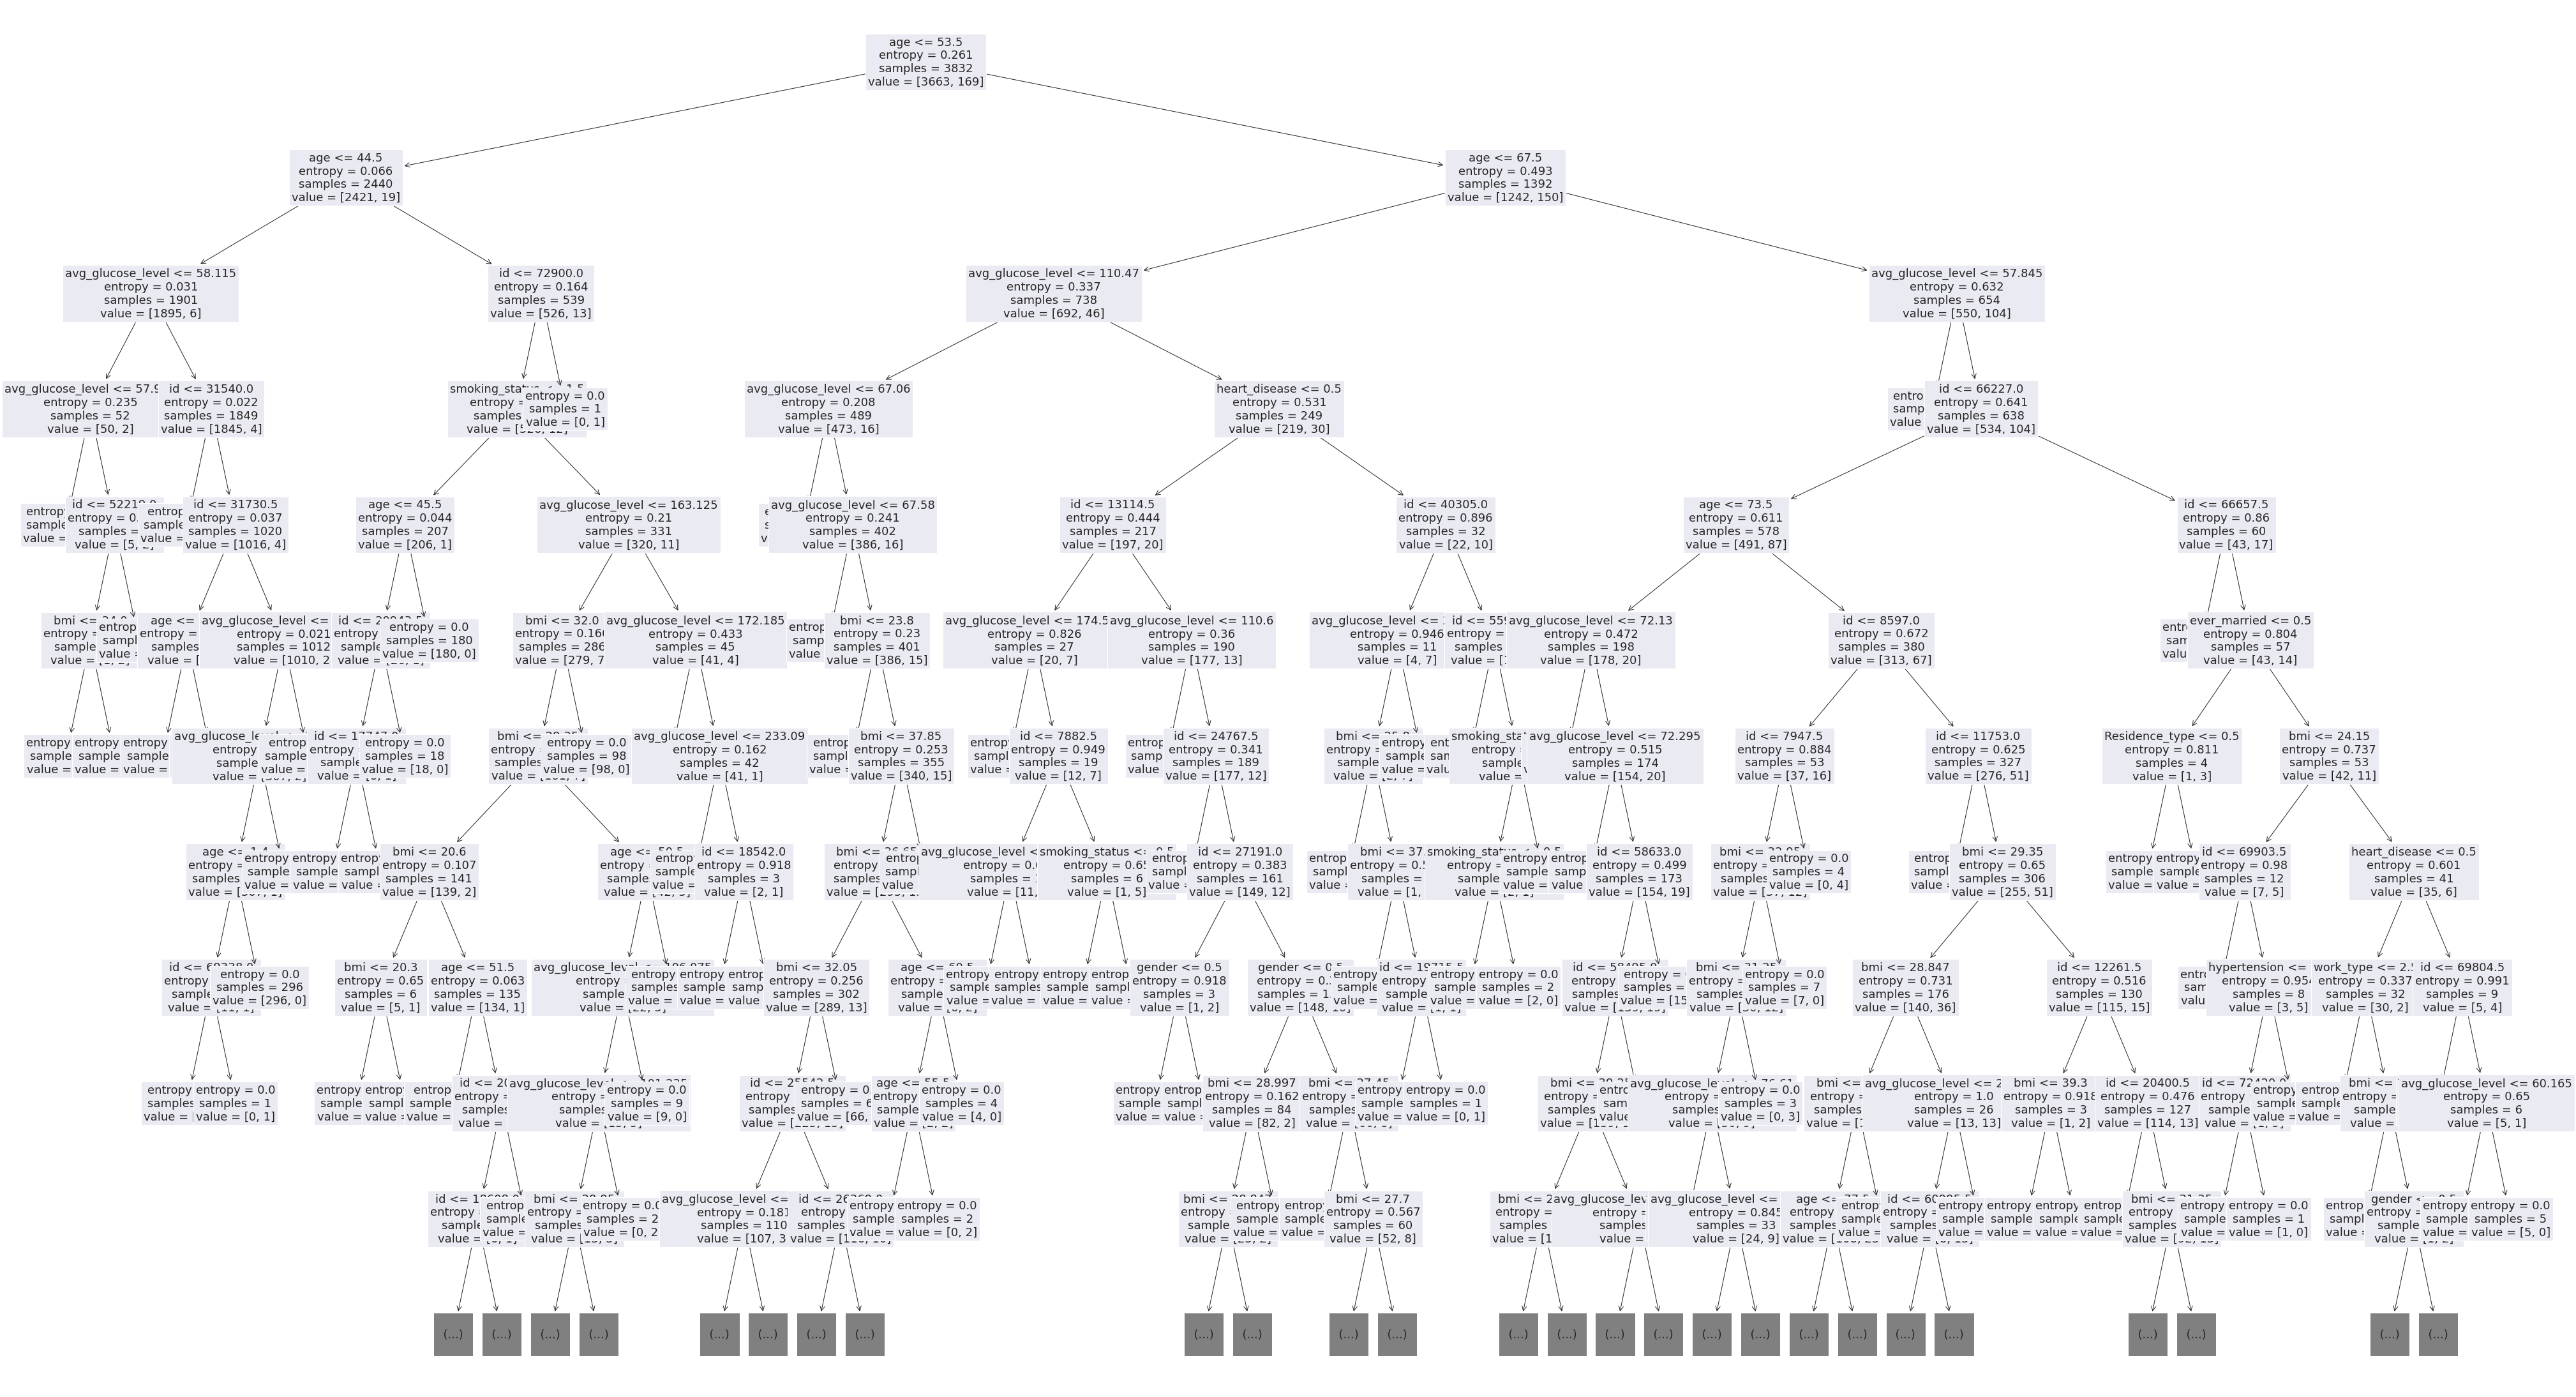

In [ ]:
fig, ax = plt.subplots(figsize=(70, 40))
tree.plot_tree(trained, feature_names= X_test.columns,  max_depth=10, fontsize=18)
plt.show()

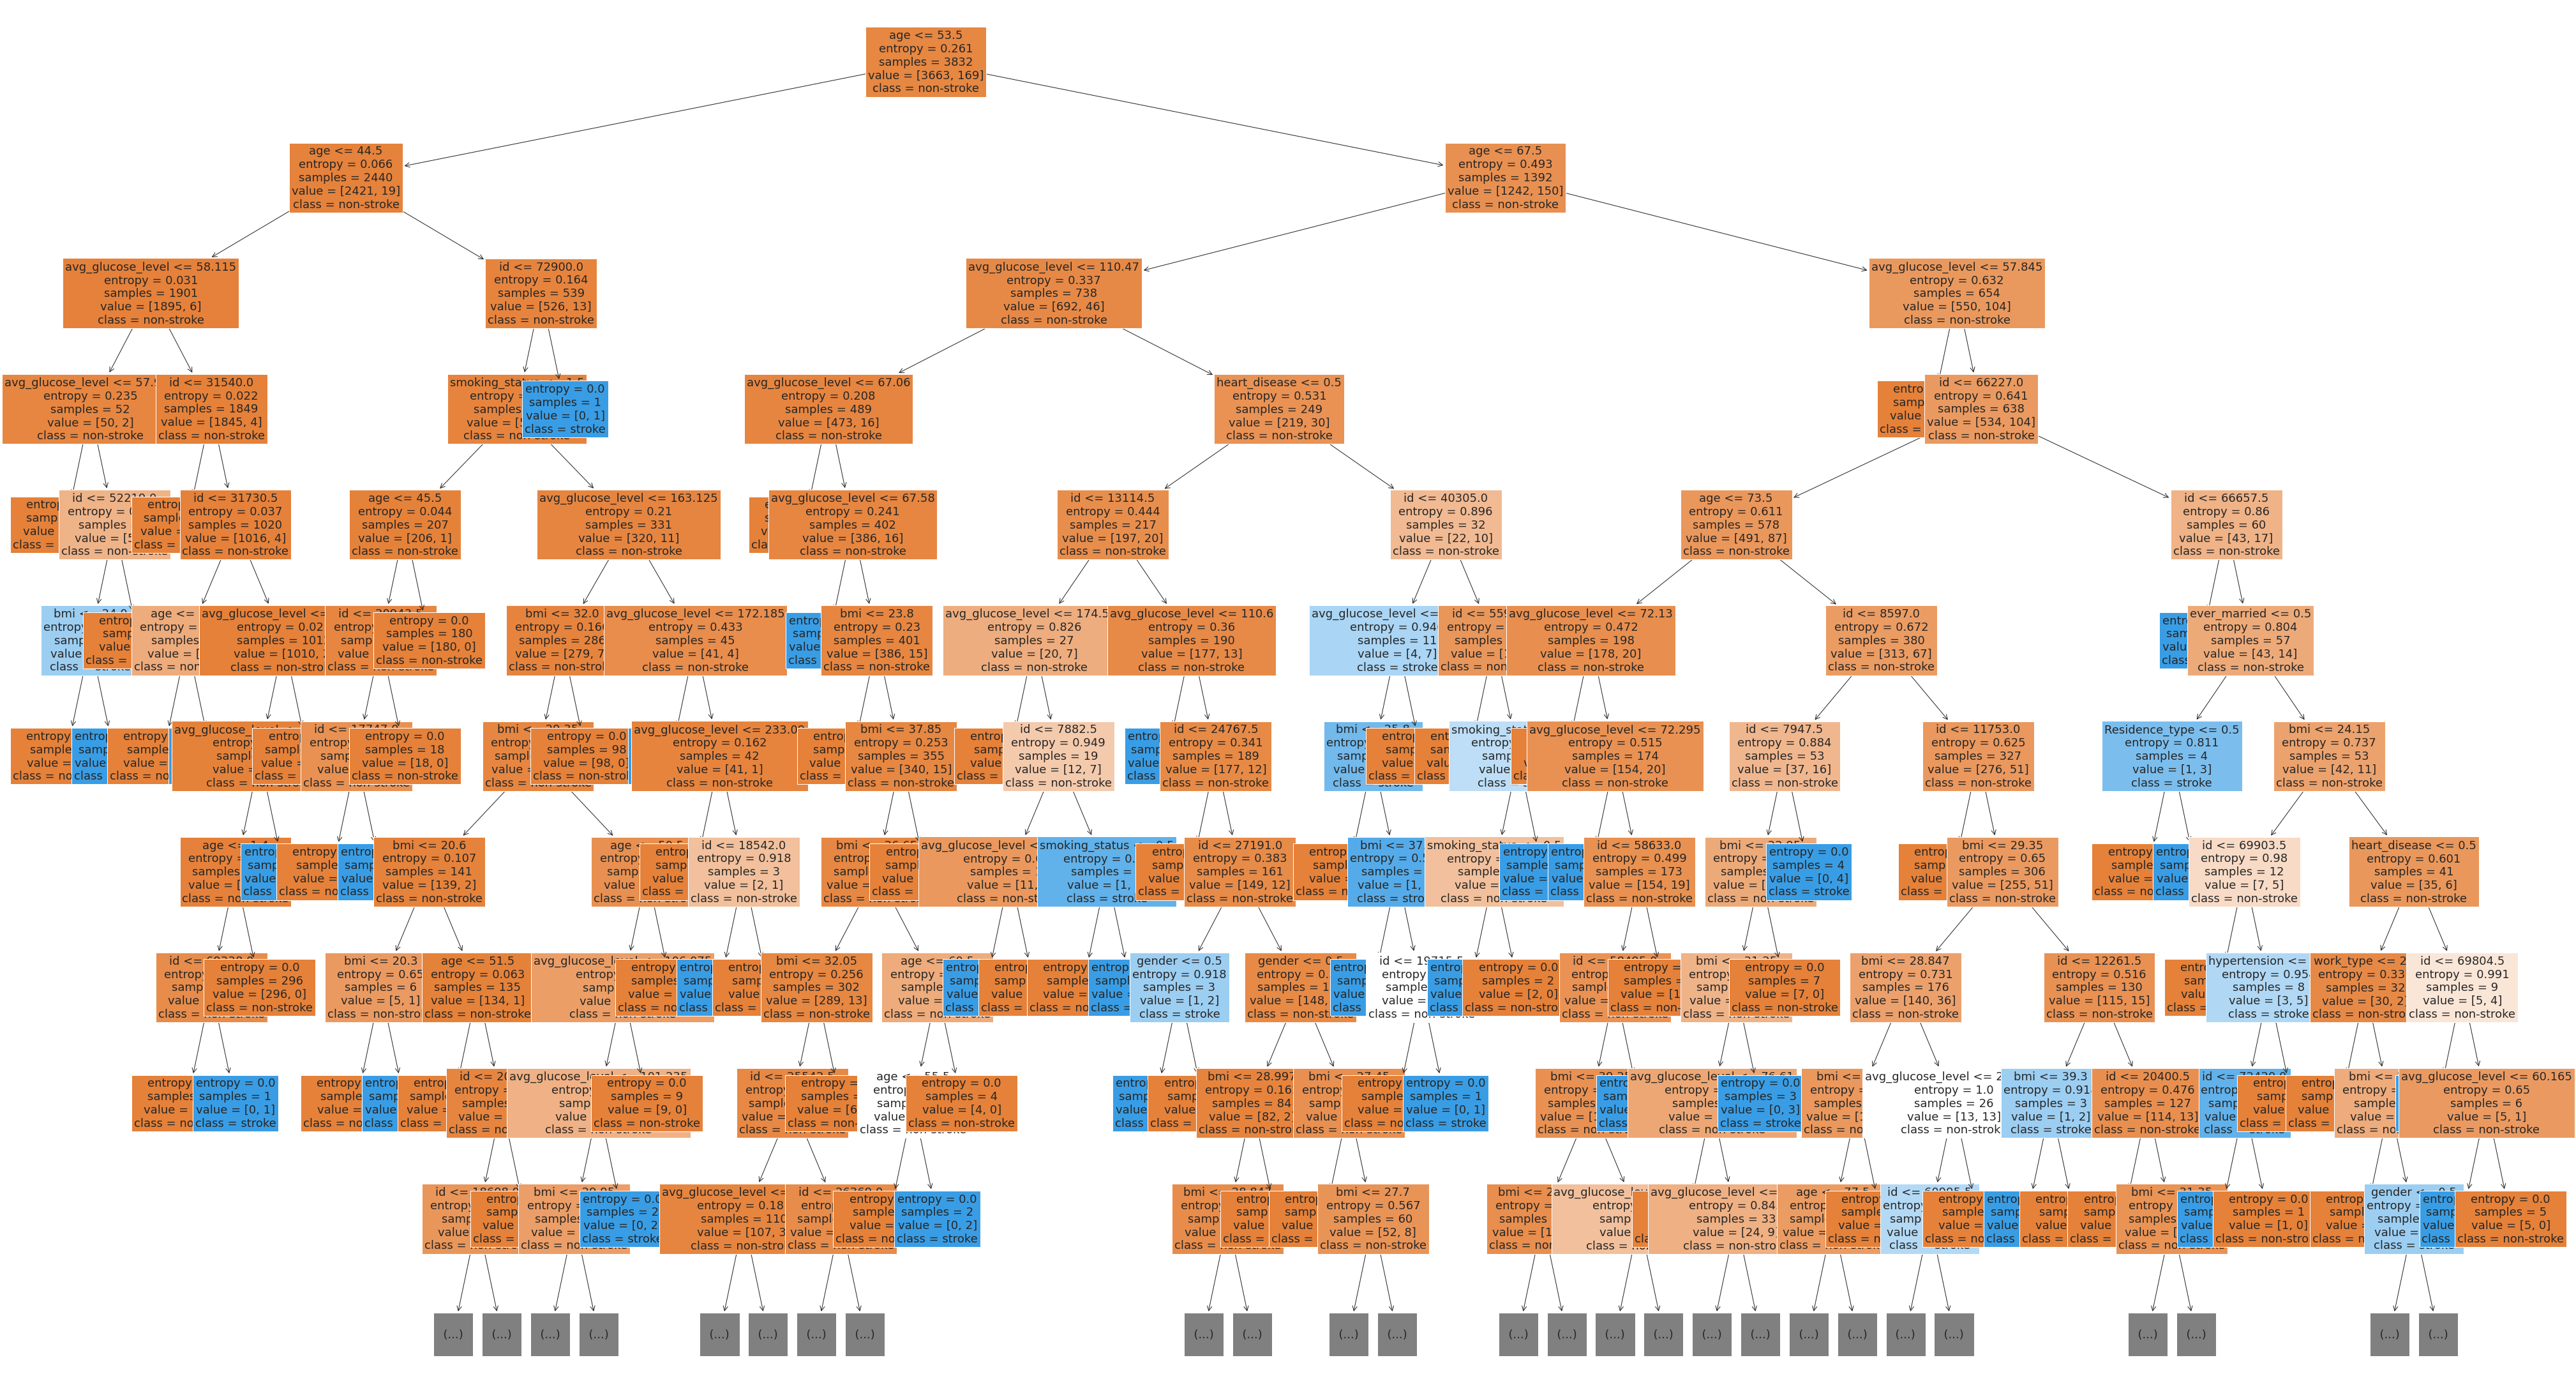

In [ ]:
# Memvisualisasikan hasil dari  Decision Tree

fig, ax = plt.subplots(figsize=(70, 40))
tree.plot_tree(trained, feature_names = X_test.columns, class_names=['non-stroke', "stroke"], filled=True, max_depth=10, fontsize=18)
plt.show()


Tanpa memandang usia, Pada kasus ini seseorang kemungkinan besar mengalami stroke jika tingkat kadar glukosa rata-rata dalam darah adalah 1 atau lebih.:



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1135,   63],
       [  68,   12]])

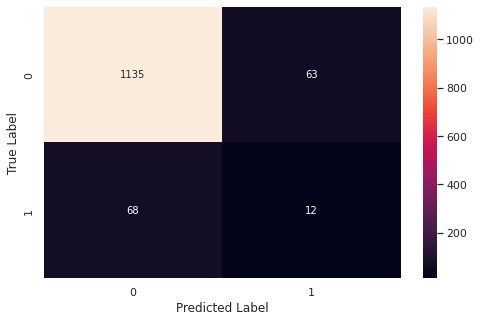

In [ ]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1198
           1       0.16      0.15      0.15        80

    accuracy                           0.90      1278
   macro avg       0.55      0.55      0.55      1278
weighted avg       0.89      0.90      0.90      1278

